<a href="https://colab.research.google.com/github/timdeklijn/hu_lecture_20200114/blob/master/notebooks/HU_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris classification

## Usecase:

Can we create a predictor that can identify an iris species based on its characteristics?

## Imports

In [0]:
import pandas as pd
import numpy as np
import requests
from io import StringIO

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Constants

A link to the iris dataset. This data set is in .csv (comma separated value) format.


In [0]:
  iris_url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv"

## Load data

In [0]:
def load_data_from_url(url):
  """
  Loads csv formatted data from a webpage. Converts to 
  stringIO and then use pd.read_csv to convert the data 
  to a pandas dataframe

  :param url: string of url to fetch data from
  :returns: pandas dataframe
  """
  return pd.read_csv(StringIO(requests.get(url).content.decode("utf-8") ))

Call the function with the URL to the iris data set. Creating a function allows for easier reuse of the code




In [0]:
df = load_data_from_url(iris_url)

## Investigate Data

Get info on column types

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Check the column names in the data



In [54]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Print the first 10 rows of the data set

In [53]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Describe the loaded data

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Show the distribution of feature values and color them by species. This plot should show that the different classes are separable over the different features. This means a (simple) machine learning model can be used as a predictor.

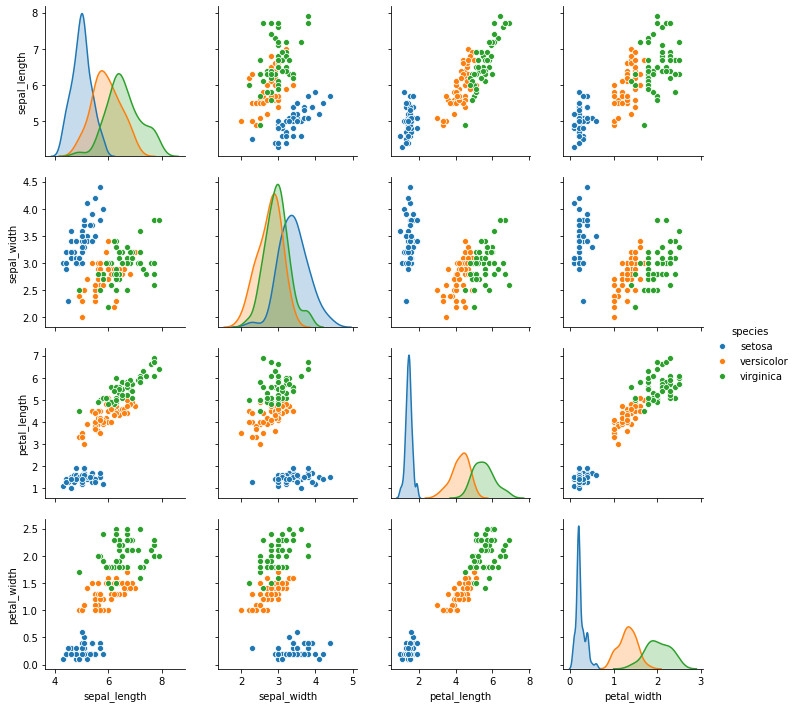

In [56]:
sns.pairplot(df, hue="species");

Check the correlation between the differenct features.

Notice that in the pairplot above, we have almost a line like:
`y=x` for the features 'petal_length vs petal_width' and to a lesser extend for 'sepal_length vs petal_width'. This results in a high correlation.




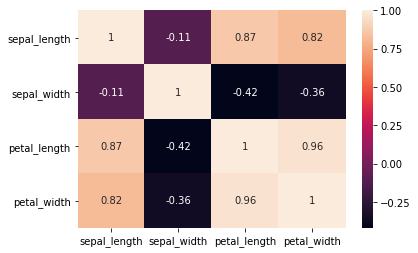

In [57]:
sns.heatmap(df.corr(), annot=True);

## Dig down into species separation

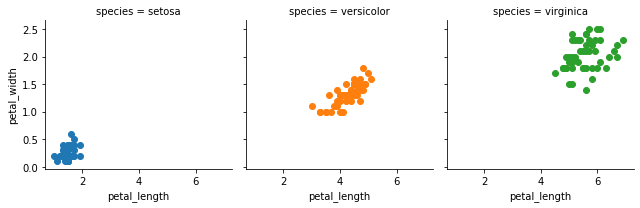

In [58]:
g = sns.FacetGrid(df, col="species", hue="species")
g.map(plt.scatter,"petal_length", "petal_width");

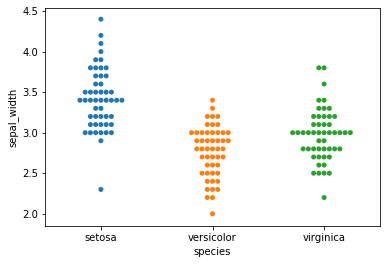

In [59]:
sns.swarmplot(x="species", y="sepal_width", data=df);

## Prepare data for machine learning

Split the data in a label column (y) and feature columns (X)

In [0]:
y_column = df.columns[-1]
X = df[df.columns[:-1]].values

Create a label encoder object. This can translate the categories (species) to numbers and vice versa.

In [0]:
le = LabelEncoder()
y = le.fit_transform(df[y_column])

Split the data into train and test sets. We train out machine learning model on the train set and check its accuracy on the test set.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

## Train a SVM model

A machine learning model that maximizes the margin ($\bar{x}$) of a hyperplane to all points of all classes.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/1280px-SVM_margin.png" width="500"/>


[wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine)

In [0]:
clf = svm.SVC();
clf.fit(X_train, y_train);

## Check the model accuracy

- for all X_test values check what the model predicts
- compare that whith the actual labels

In [16]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {acc}")

Model accuracy: 1.0


## Actually use the model

- We find a wild iris and measure it's petal and sepal properties
- We ask the model what species of iris we are dealing with


In [0]:
sepal_length = 4
sepal_width = 4
petal_length = 4
petal_width = 4

imaginairy_iris = np.array(
    [sepal_length, sepal_width, petal_length, petal_width]
    ).reshape(-1, 4)

In [19]:
print(
    f"The iris is of the species: {le.inverse_transform(clf.predict(imaginairy_iris))[0]}"
    )

The iris is of the species: virginica
